In [1]:
from plotting_utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import rankdata, ttest_ind
from scipy.stats import friedmanchisquare
import scikit_posthocs as sp
from itertools import combinations

In [2]:
datasets = [
    "Sulfonyl Fluoride 1", "Sulfonyl Fluoride 2", "Sulfonyl Fluoride 3", "Sulfonyl Fluoride 4", "Sulfonyl Fluoride 5", 
    "Amide", "Amine", "Sulfonamide", "Thiol", 
    "Whole amine", "Whole bromide"
]
all_models_ordered = ["Baseline", "RFR", "RFC", "KNN", "LRRF", "RPC", "IBM", "IBPL"]
rf_based_models_ordered = ["Baseline", "RFR", "RFC", "LRRF", "RPC"]

# Complete datasets with four reaction conditions

## Fingerprints

In [3]:
fp_analyzer = Analyzer("fp", all_models_ordered, 0)
fp_perf_df = fp_analyzer.avg_perf_df

fp_rr_table, fp_kt_table = get_rr_kt_tables(fp_perf_df, all_models_ordered)
p_rr, p_kt = run_friedman_tests(fp_rr_table, fp_kt_table, all_models_ordered)

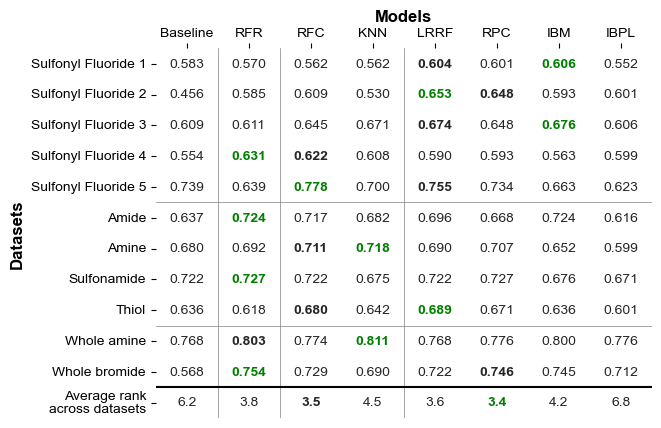

In [4]:
plot_table_with_heatmap(fp_rr_table, all_models_ordered, datasets)

## DFT

In [5]:
desc_analyzer = Analyzer("desc", rf_based_models_ordered, 0)
desc_perf_df = desc_analyzer.avg_perf_df

In [6]:
# Then combine with the nearest-neighbor based models
combined_avg_perf_df = pd.concat([
    fp_perf_df[fp_perf_df["model"].isin(["KNN", "IBM", "IBPL"])], 
    desc_perf_df
])

combined_rr_table, combined_kt_table = get_rr_kt_tables(combined_avg_perf_df, all_models_ordered)
p_combined_rr, p_combined_kt = run_friedman_tests(combined_rr_table, combined_kt_table, all_models_ordered)

print(p_combined_rr, p_combined_kt)

0.0005369463978359898 8.517486462775443e-07


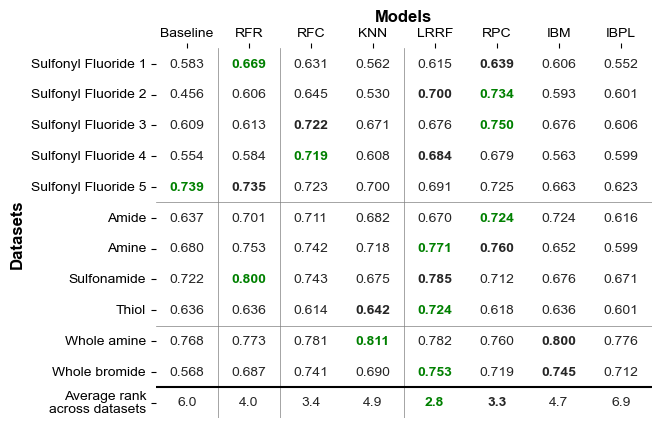

In [7]:
### metric = MRR
plot_table_with_heatmap(combined_rr_table, all_models_ordered, datasets, save="Figure4A_table_FINAL_v2.svg")

<Figure size 640x480 with 0 Axes>

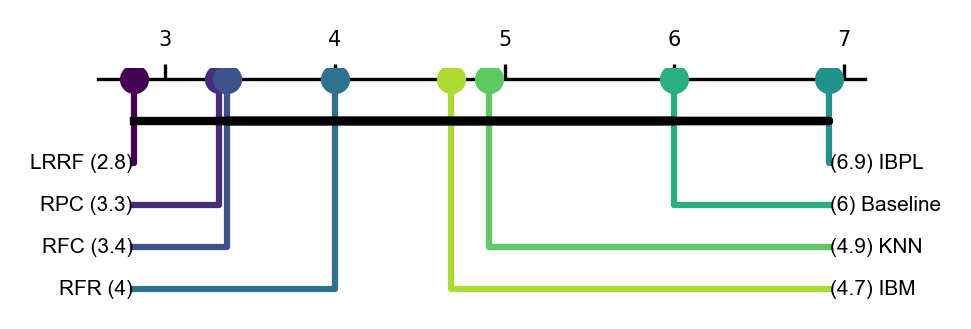

In [8]:
plot_bonferroni_dunn(combined_rr_table, all_models_ordered, False) # , save="SI/FigureS11_bonferonni_dunn.svg"
# Probably due to the small number of datasets compared to the number of algorithms being controlled,
# there isn't a significance in performance difference between the algorithms.

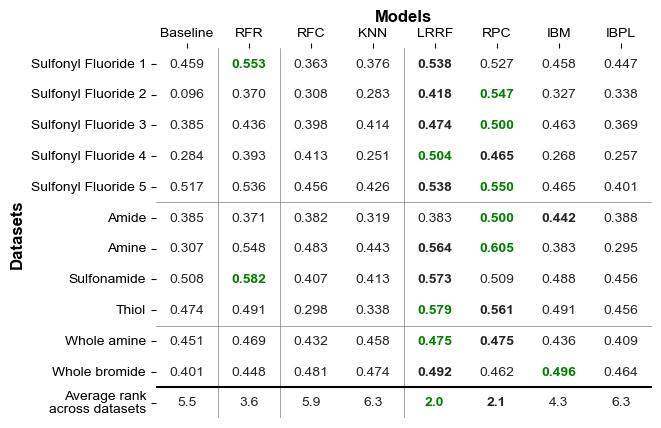

In [9]:
### metric = kendall tau
plot_table_with_heatmap(combined_kt_table, all_models_ordered, datasets, save="SI/FigureS10_kendalltau_dft_FINAL_v2.svg")

## Onehot

In [10]:
ohe_analyzer = Analyzer("onehot", rf_based_models_ordered[1:], 0)
ohe_perf_df = ohe_analyzer.avg_perf_df

ohe_rr_table, ohe_kt_table = get_rr_kt_tables(ohe_perf_df, rf_based_models_ordered[1:])
p_rr_ohe, p_kt_ohe = run_friedman_tests(ohe_rr_table, ohe_kt_table, rf_based_models_ordered[1:])

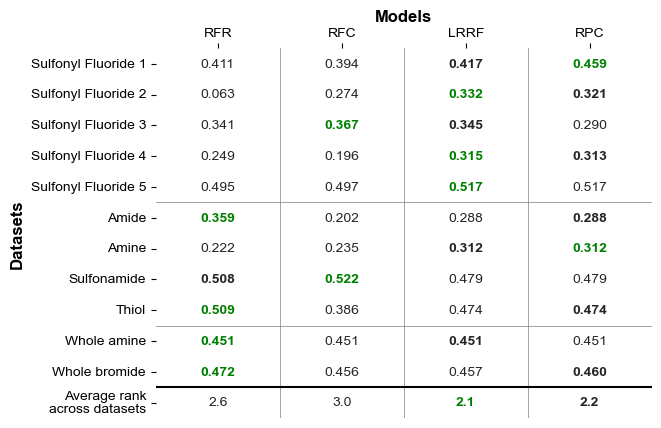

In [11]:
# Kendall tau rank coefficient score with onehot representation
plot_table_with_heatmap(ohe_kt_table, rf_based_models_ordered[1:], datasets, vline_pos=[1,2,3])

/var/folders/05/jxqj_ld96mx38n9knzsjp58c0000gn/T/ipykernel_1434/3525947044.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontfamily":"arial", "fontsize":6})


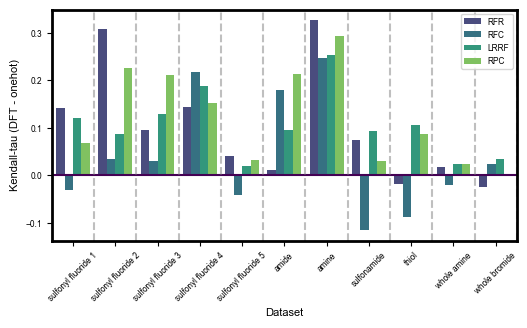

In [12]:
# Difference from descriptors
desc_rr_table, desc_kt_table = get_rr_kt_tables(desc_perf_df, rf_based_models_ordered[1:])
ohe_diff = desc_kt_table - ohe_kt_table
ohe_diff_to_plot = pd.melt(ohe_diff, ignore_index=False, value_name="DFT - onehot").reset_index()

fig, ax = plt.subplots(figsize=(6,3))
sns.barplot(ohe_diff_to_plot, x="dataset", y="DFT - onehot", hue="model", palette="viridis")
dataset_labels = list(ohe_diff_to_plot["dataset"].unique())
processed_dataset_labels = []
for label in dataset_labels :
    transform, dataset = label.split("-")
    if transform == "Deoxy" :
        dataset = dataset[:-1] + f"{int(dataset[-1])+1}"
    processed_dataset_labels.append(dataset) 

ax.set_xticklabels(processed_dataset_labels, rotation=45, fontdict={"fontfamily":"arial", "fontsize":6})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontfamily":"arial", "fontsize":6})
ax.set_xlabel("Dataset", fontdict={"fontfamily":"arial", "fontsize":8})
ax.set_ylabel("Kendall-tau (DFT - onehot)", fontdict={"fontfamily":"arial", "fontsize":8})
ax.legend(loc='upper right', fontsize=6, prop={"size":6, "family":"arial"})
ax.axhline(0, 0, 1)
for i in range(len(processed_dataset_labels)) :
    ax.axvline(i+0.5, 0, 1, ls="--", c="grey", alpha=0.5)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
plt.savefig(f"figures/SI/FigureS11_DFT-onehot_FINAL_v2.svg", dpi=300, format="svg")

## Random Descriptors

In [13]:
rand_analyzer = Analyzer("random", rf_based_models_ordered[1:], 0)
rand_perf_df = rand_analyzer.avg_perf_df
rand_rr_table, rand_kt_table = get_rr_kt_tables(rand_perf_df, rf_based_models_ordered[1:])

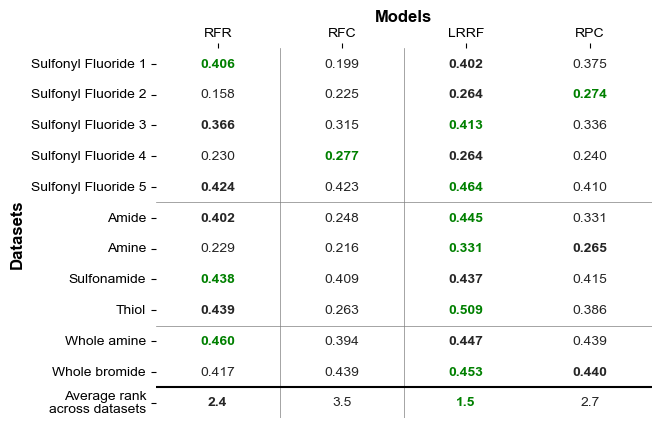

In [14]:
desc_rr_table, desc_kt_table = get_rr_kt_tables(desc_perf_df, rf_based_models_ordered[1:])
# desc_rr_table
plot_table_with_heatmap(rand_kt_table, rf_based_models_ordered[1:], datasets)

/var/folders/05/jxqj_ld96mx38n9knzsjp58c0000gn/T/ipykernel_1434/2314278897.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontfamily":"arial", "fontsize":6})


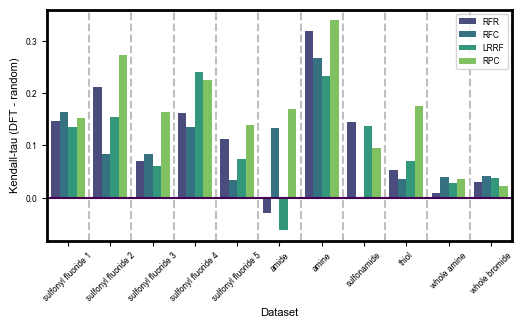

In [15]:
# Difference from descriptors
rand_diff = desc_kt_table - rand_kt_table
rand_diff_to_plot = pd.melt(rand_diff, ignore_index=False, value_name="DFT - random").reset_index()

fig, ax = plt.subplots(figsize=(6,3))
sns.barplot(rand_diff_to_plot, x="dataset", y="DFT - random", hue="model", palette="viridis")
dataset_labels = list(ohe_diff_to_plot["dataset"].unique())
processed_dataset_labels = []
for label in dataset_labels :
    transform, dataset = label.split("-")
    if transform == "Deoxy" :
        dataset = dataset[:-1] + f"{int(dataset[-1])+1}"
    processed_dataset_labels.append(dataset) 

ax.set_xticklabels(processed_dataset_labels, rotation=45, fontdict={"fontfamily":"arial", "fontsize":6})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontfamily":"arial", "fontsize":6})
ax.set_xlabel("Dataset", fontdict={"fontfamily":"arial", "fontsize":8})
ax.set_ylabel("Kendall-tau (DFT - random)", fontdict={"fontfamily":"arial", "fontsize":8})
ax.legend(loc='upper right', fontsize=6, prop={"size":6, "family":"arial"})
ax.axhline(0, 0, 1)
for i in range(len(processed_dataset_labels)) :
    ax.axvline(i+0.5, 0, 1, ls="--", c="grey", alpha=0.5)
for axis in ["top", "bottom", "left", "right"]:
    ax.spines[axis].set_linewidth(2)
plt.savefig(f"figures/SI/FigureS11B_DFT-random_FINAL_v2.svg", dpi=300, format="svg")

In [16]:
# Table S1
from scipy.stats import ttest_ind

for model in rf_based_models_ordered[1:]:
    desc_kt_vals = desc_kt_table[[model]].values.flatten()
    ohe_kt_vals = ohe_kt_table[[model]].values.flatten()
    random_kt_vals = rand_kt_table[[model]].values.flatten()
    
    _, vs_ohe_p = ttest_ind(desc_kt_vals, ohe_kt_vals, alternative="greater")
    _, vs_rand_p = ttest_ind(desc_kt_vals, random_kt_vals, alternative="greater")

    if model != "RPC" :
        print(model, round(vs_ohe_p, 3), round(vs_rand_p, 3))
    else :
        print(model, vs_ohe_p, vs_rand_p)

RFR 0.025 0.005
RFC 0.165 0.006
LRRF 0.002 0.002
RPC 0.0003499023978767521 1.5186052289071503e-06


array([ 20,  17,   7,   4,   4,   3,   2,   2,   1,   1,  -4,  -7, -12])

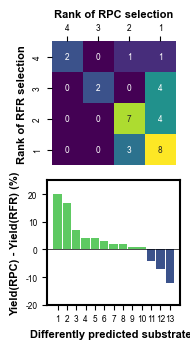

In [17]:
compare_specific_recommendations("deoxy2", "RFR", "RPC", vmax=25, save=True) # 

array([ 52,  42,  33,   5, -13])

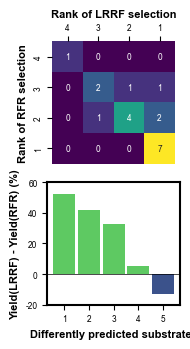

In [18]:
compare_specific_recommendations("nature_thiol", "RFR", "LRRF", vmin=-20, vmax=60 ,yticks=[-20, 0, 20, 40, 60], save=True) # 

#### Comparing ALL CASES

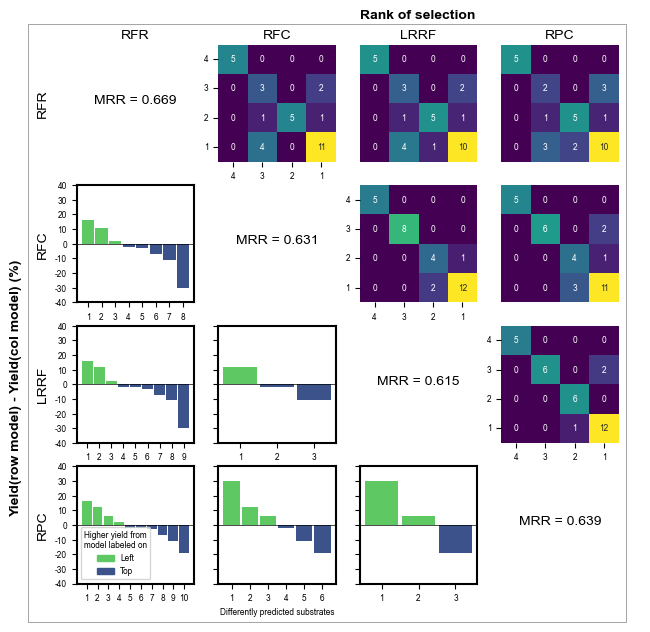

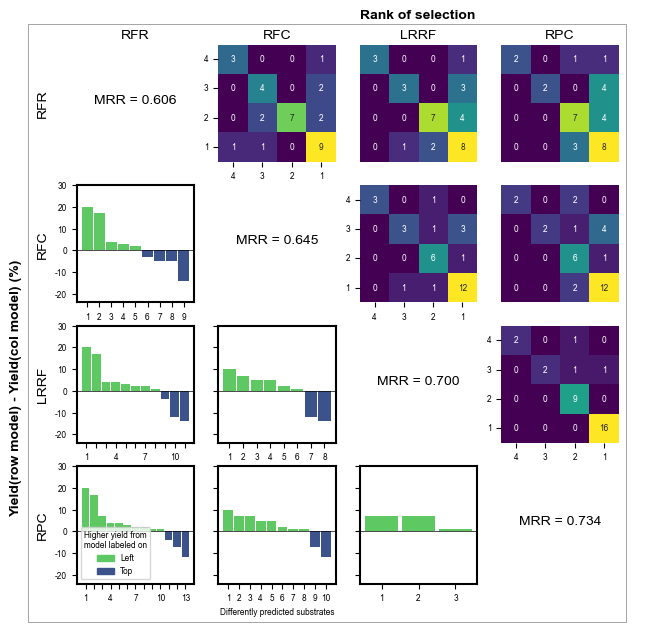

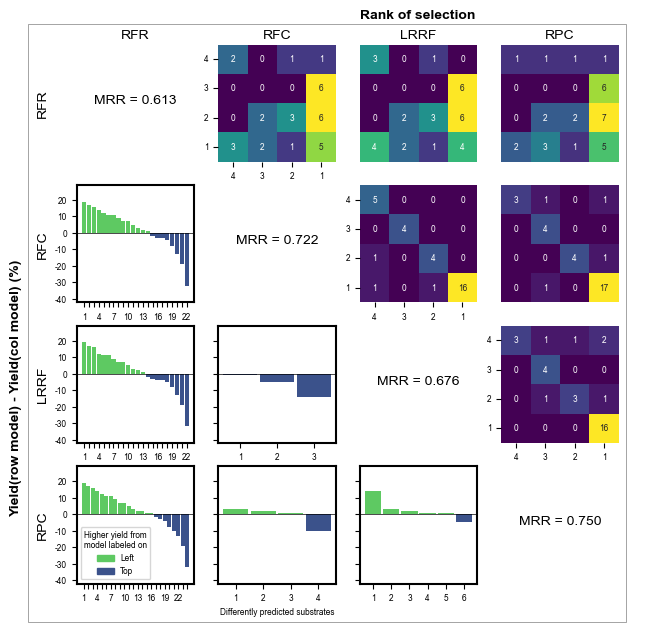

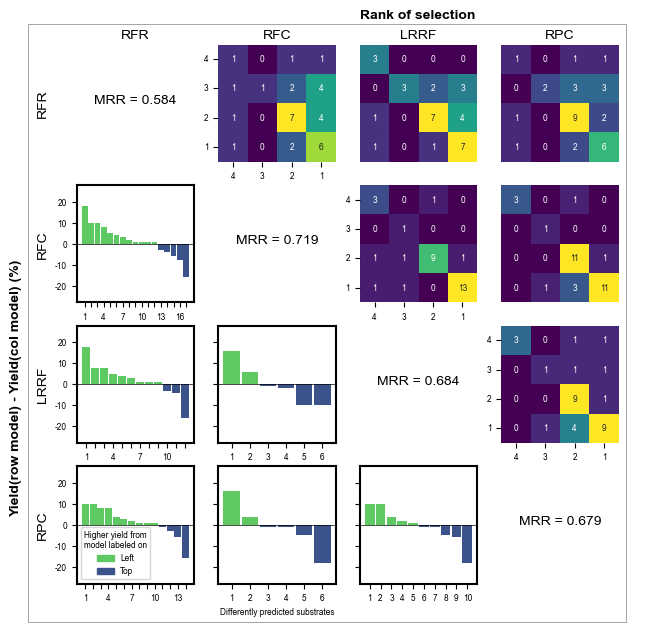

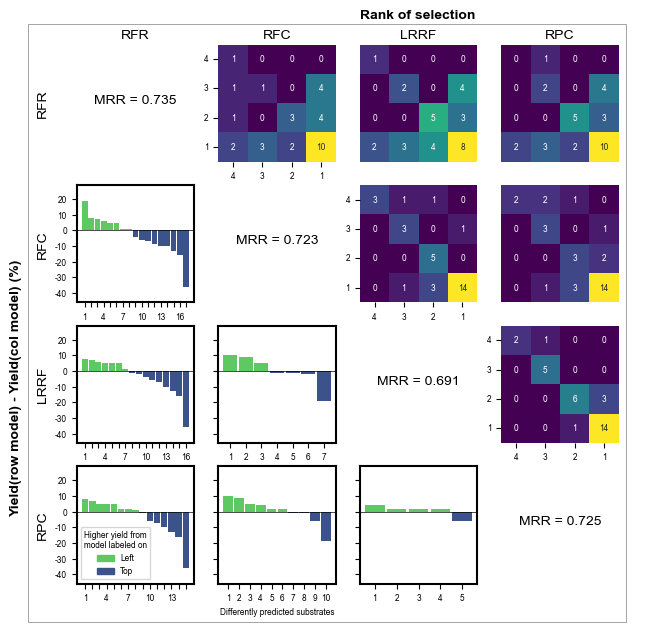

In [19]:
# all datasets
for i in range(5) :
    rank_regret_trellis(f"deoxy{i+1}", True)

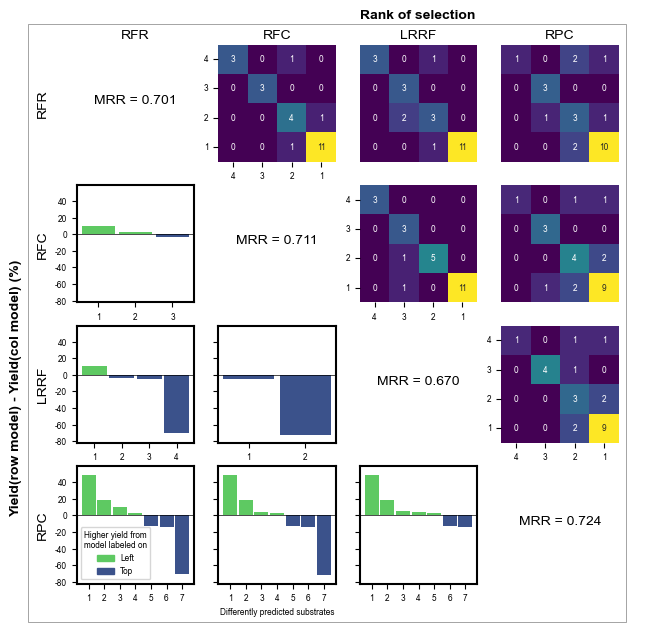

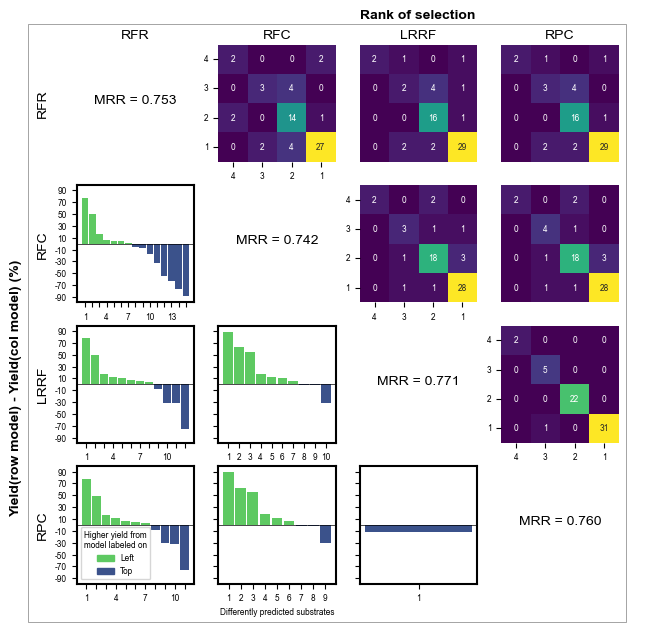

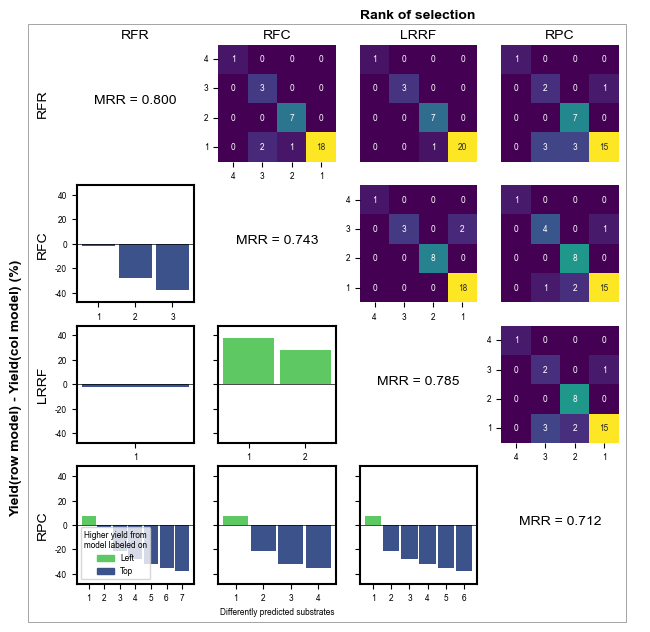

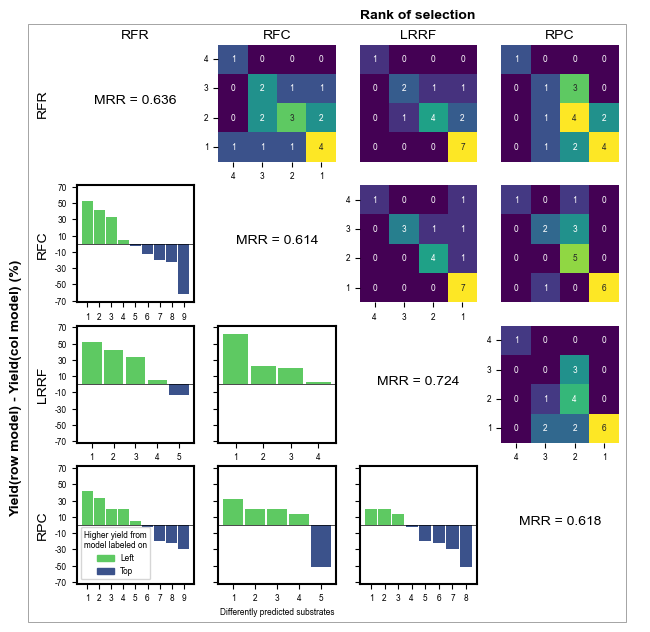

In [20]:
for nuc in ["amide", "amine", "sulfonamide", "thiol"]:
    rank_regret_trellis(f"natureHTE_{nuc}", True) # 

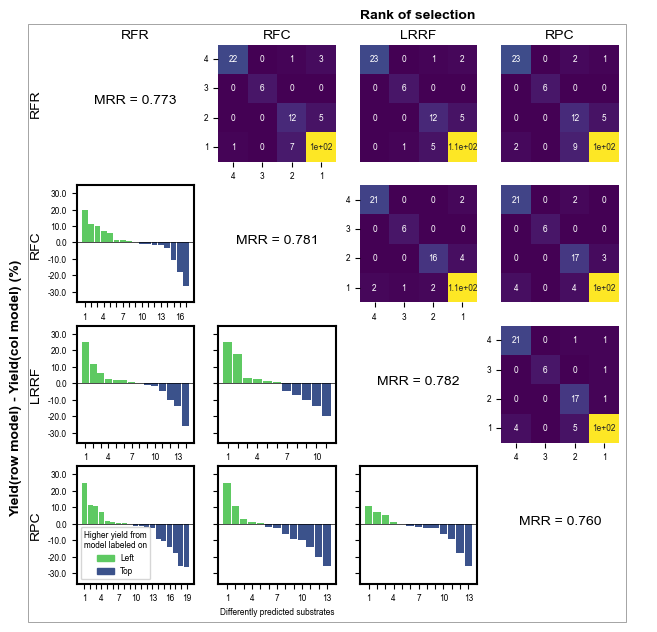

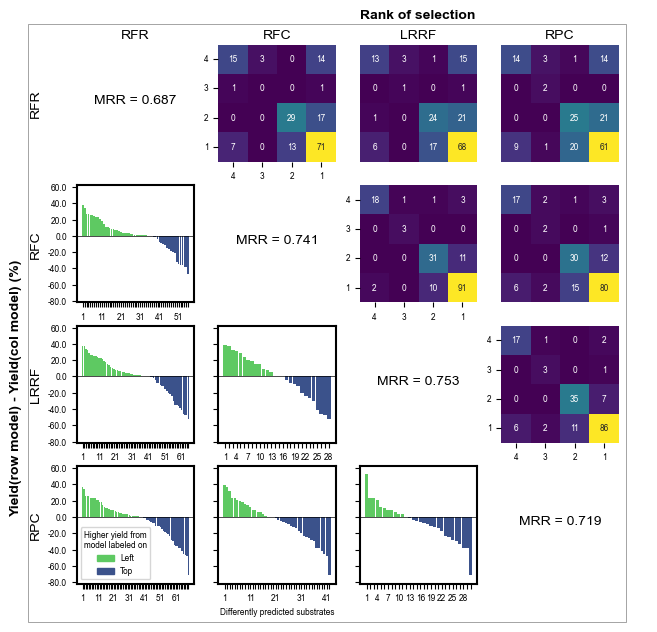

In [21]:
for subs in ["amine", "bromide"]:
    rank_regret_trellis(f"science_{subs}", True)

# Datasets randomly missing 25%

In [22]:
## For the NN_based models
m1_fp_analyzer = Analyzer("fp", all_models_ordered, 1)
m1_fp_perf_df = m1_fp_analyzer.avg_perf_df

# 
m1_desc_analyzer = Analyzer("desc", rf_based_models_ordered, 1)
m1_desc_perf_df = m1_desc_analyzer.avg_perf_df

# Then combine with the nearest-neighbor based models
m1_combined_avg_perf_df = pd.concat([
    m1_fp_perf_df[m1_fp_perf_df["model"].isin(["KNN", "IBM", "IBPL"])], 
    m1_desc_perf_df
])

m1_combined_rr_table, m1_combined_kt_table = get_rr_kt_tables(m1_combined_avg_perf_df, all_models_ordered)
m1_p_combined_rr, m1_p_combined_kt = run_friedman_tests(m1_combined_rr_table, m1_combined_kt_table, all_models_ordered)

print(m1_p_combined_rr, m1_p_combined_kt)

4.607510529049048e-07 1.7024478479601775e-08


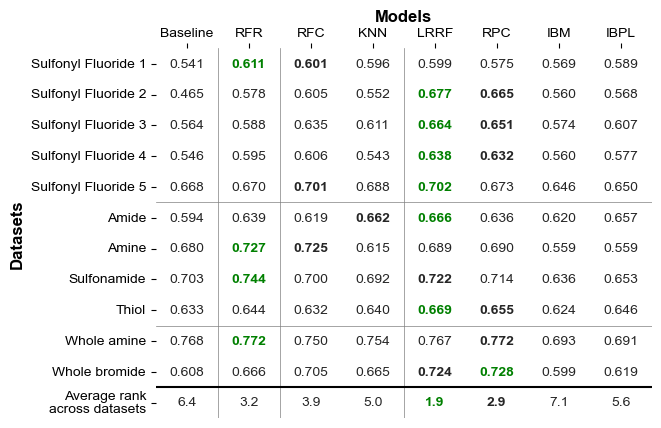

In [23]:
plot_table_with_heatmap(m1_combined_rr_table, all_models_ordered, datasets, save="FigureS23_table_v2.svg")

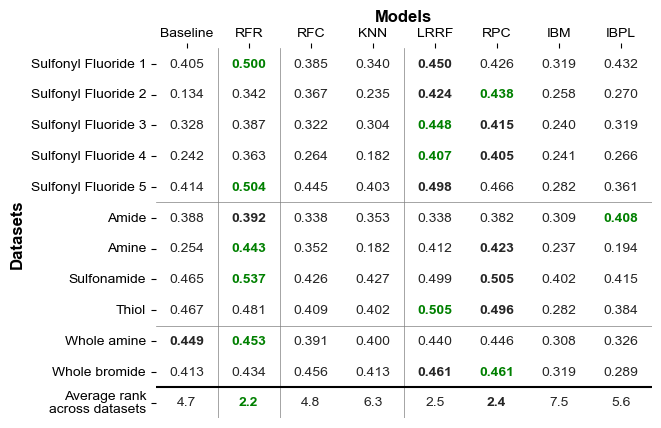

In [24]:
plot_table_with_heatmap(m1_combined_kt_table, all_models_ordered, datasets, save="FigureS24_table_v2.svg")

# Datasets randomly missing 50%

In [25]:
## For the NN_based models
m2_fp_analyzer = Analyzer("fp", all_models_ordered, 2)
m2_fp_perf_df = m2_fp_analyzer.avg_perf_df

# 
m2_desc_analyzer = Analyzer("desc", rf_based_models_ordered, 2)
m2_desc_perf_df = m2_desc_analyzer.avg_perf_df

# Then combine with the nearest-neighbor based models
m2_combined_avg_perf_df = pd.concat([
    m2_fp_perf_df[m2_fp_perf_df["model"].isin(["KNN", "IBM", "IBPL"])], 
    m2_desc_perf_df
])

m2_combined_rr_table, m2_combined_kt_table = get_rr_kt_tables(m2_combined_avg_perf_df, all_models_ordered)
m2_p_combined_rr, m2_p_combined_kt = run_friedman_tests(m2_combined_rr_table, m2_combined_kt_table, all_models_ordered)

print(m2_p_combined_rr, m2_p_combined_kt)

0.004195482090222618 9.255862197735209e-07


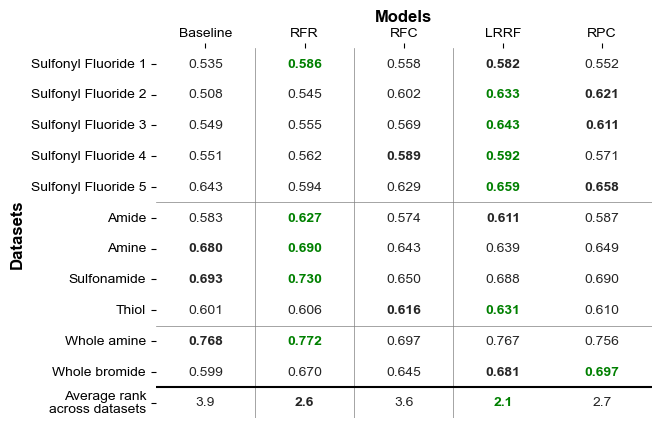

In [26]:
m2_desc_rr_table, m2_desc_kt_table = get_rr_kt_tables(m2_desc_perf_df, rf_based_models_ordered)
plot_table_with_heatmap(m2_desc_rr_table, rf_based_models_ordered, datasets, vline_pos=[1,2,3], save="Figure5A_table_v2.svg")

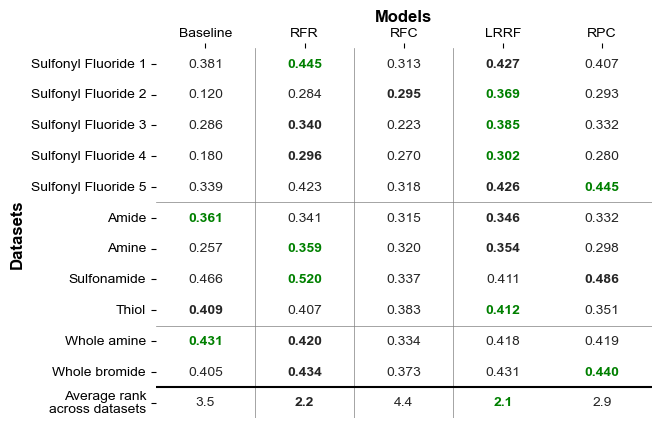

In [27]:
plot_table_with_heatmap(m2_desc_kt_table, rf_based_models_ordered, datasets, vline_pos=[1,2,3], save="FigureS25_table_v2.svg")

# All data schemes together

### Drawing a trendline trellis

Text(0.47, 0.01, 'Missing Data (%)')

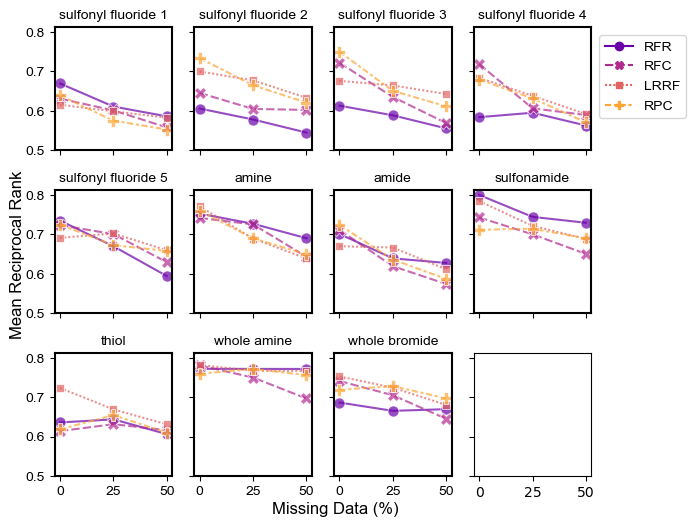

In [29]:
full_df = pd.concat([combined_avg_perf_df, m1_combined_avg_perf_df, m2_combined_avg_perf_df])
full_df["Missing Portion"] = [0]*combined_avg_perf_df.shape[0] + [25]*m1_combined_avg_perf_df.shape[0] + [50] * m2_combined_avg_perf_df.shape[0]

fig, ax = plt.subplots(ncols=4, nrows=3, sharex=True, sharey=True, tight_layout=True, figsize=(6.9,5.2))
for i, dataset_to_plot in enumerate(full_df["dataset"].unique()) :
    row = i // 4
    col = i % 4
    sns.lineplot(
        full_df[
            (full_df["model"].isin(["RFR","RFC","LRRF","RPC"])) &\
            (full_df["dataset"]==dataset_to_plot)
        ], 
        x="Missing Portion", y="average reciprocal rank",
        hue="model", style="model", ax=ax[row, col], markers=True,
        palette="plasma",
        markersize=8, alpha=0.7
    )
    ax[row, col].set_xticks([0,25,50])
    ax[row, col].set_yticks([0.5+0.1*x for x in range(4)])
    if row == 2 :
        ax[row, col].set_xticklabels([0,25,50], fontdict={"fontsize":10, "fontfamily":"arial"})
        ax[row, col].set_xlabel("")
    if col == 0 :
        ax[row, col].set_yticklabels([0.5+0.1*x for x in range(4)], fontdict={"fontsize":10, "fontfamily":"arial"})
        ax[row, col].set_ylabel("")
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[row, col].spines[axis].set_linewidth(1.5)
    if row == 0 and col == 3 :
        l = ax[row, col].legend(bbox_to_anchor=(1.01,0.99)) 
        plt.setp(l.texts, family="arial", size=10)
        pass
    else :
        ax[row, col].get_legend().remove()
    title = dataset_to_plot.split("-")[1]
    if "sulfonyl" in title :
        ind_num = int(title[-1])+1
        ax[row, col].set_title(title[:-1]+str(ind_num), fontsize=10, fontfamily="arial")
    else :
        ax[row, col].set_title(title, fontsize=10, fontfamily="arial")

fig.text(0.01, 0.5, "Mean Reciprocal Rank", ha="center", va="center", rotation="vertical", fontdict={"fontsize":12, "fontfamily":"arial"})
fig.text(0.47, 0.01, "Missing Data (%)", ha="center", va="center", fontdict={"fontsize":12, "fontfamily":"arial"})
# plt.savefig("figures/Figure5_v1.svg", dpi=300, format="svg")

['Deoxy-sulfonyl fluoride 0', 'Deoxy-sulfonyl fluoride 1', 'Deoxy-sulfonyl fluoride 2', 'Deoxy-sulfonyl fluoride 3', 'Deoxy-sulfonyl fluoride 4', 'Nature-amide', 'Nature-amine', 'Nature-sulfonamide', 'Nature-thiol', 'Science-whole amine', 'Science-whole bromide']


/var/folders/05/jxqj_ld96mx38n9knzsjp58c0000gn/T/ipykernel_1434/1880147605.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontsize":6, "fontfamily":"arial"})


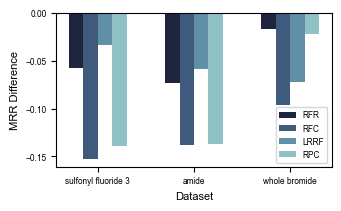

In [30]:
# Showing examples with largest decrease in MRR scores
mrr_diff = np.zeros((4, 11))
models_to_consider = ["RFR", "RFC", "LRRF", "RPC"]
datasets = sorted(full_df["dataset"].unique())
print(datasets)

for i, dataset in enumerate(datasets):
    for j, model in enumerate(models_to_consider):
        mrr_vals = full_df[
            (full_df["dataset"] == dataset) &\
            (full_df["model"] == model)
        ]["average reciprocal rank"]
        mrr_diff[j, i] = mrr_vals.iloc[-1] - mrr_vals.iloc[0]


# datasets_to_consider = [np.unravel_index(np.argmin(x, axis=None), x.shape)[1] for x in [mrr_diff[:, :5], mrr_diff[:, 5:9], mrr_diff[:, 9:]]]
datasets_to_consider = [np.argmin(np.mean(x, axis=0)) for x in [mrr_diff[:, :5], mrr_diff[:, 5:9], mrr_diff[:, 9:]]]
datasets_to_consider[1] += 5
datasets_to_consider[2] += 9
partial_mrr_diff = mrr_diff[:, datasets_to_consider]

pal = sns.cubehelix_palette(4, rot=-.25, light=.7)

# fig, ax = plt.subplots(ncols=3, sharey=True, tight_layout=True, figsize=(3.3, 2))
fig, ax = plt.subplots(layout="constrained", figsize=(3.3, 2))
dataset_names = [datasets[x].split("-")[1] for x in datasets_to_consider]
dataset_names[0] = "sulfonyl fluoride 3"
decreases = {
    x:partial_mrr_diff[i] for i, x in enumerate(models_to_consider)
}
x = np.arange(len(dataset_names))
width=0.15
multiplier = -0.5

for i, (model, diff) in enumerate(decreases.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, diff, width, label=model, color=pal[3-i])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontsize":6, "fontfamily":"arial"})
ax.set_ylabel('MRR Difference', fontdict={"fontsize":8, "fontfamily":"arial"})
ax.set_xticks(x + width, dataset_names)
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, fontdict={"fontsize":6, "fontfamily":"arial"})
ax.set_xlabel("Dataset", fontdict={"fontsize":8, "fontfamily":"arial"})
ax.legend(loc='lower right', fontsize=6, prop={"size":6, "family":"arial"})
plt.savefig("figures/Figure5B_FINAL.svg", dpi=300, format="svg")

/var/folders/05/jxqj_ld96mx38n9knzsjp58c0000gn/T/ipykernel_1434/619174023.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontsize":6, "fontfamily":"arial"})


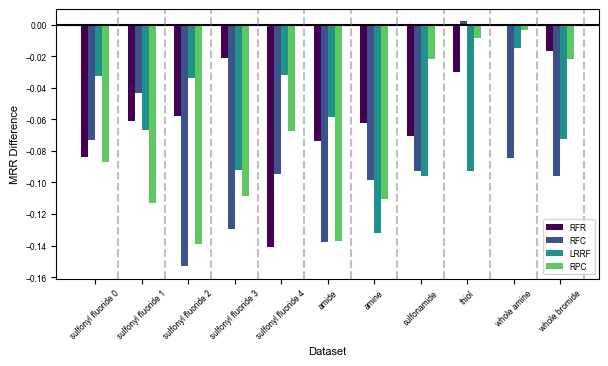

In [31]:
decreases = {
    x:mrr_diff[i] for i, x in enumerate(models_to_consider)
}

dataset_names = [x.split("-")[1] for x in datasets]
x = np.arange(len(datasets))
width=0.15
multiplier = -0.5

colors = ["#440154", "#3b528b", "#21918c", "#5ec962"]
fig, ax = plt.subplots(figsize=(7,3.5))
for i, (model, diff) in enumerate(decreases.items()):
    offset = width * multiplier
    rects = ax.bar(x + offset, diff, width, label=model, color=colors[i])
    # ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontsize":6, "fontfamily":"arial"})
ax.set_ylabel('MRR Difference', fontdict={"fontsize":8, "fontfamily":"arial"})
ax.set_xticks(x + width, dataset_names)
xticklabels = ax.get_xticklabels()
ax.set_xticklabels(xticklabels, fontdict={"fontsize":6, "fontfamily":"arial"}, rotation=45)
ax.set_xlabel("Dataset", fontdict={"fontsize":8, "fontfamily":"arial"})
ax.legend(loc='lower right', fontsize=6, prop={"size":6, "family":"arial"})
ax.axhline(0, 0, 1, c="black")

for i in range(len(processed_dataset_labels)) :
    ax.axvline(i+0.65, 0, 1, ls="--", c="grey", alpha=0.5)
plt.savefig("figures/FigureS26.svg", dpi=300, format="svg")

### Comparing robustness against missing reactions

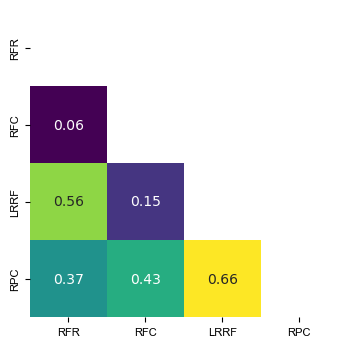

In [32]:
# Student t-test of decrease in performance by missing reactions 
m2_diff = m2_combined_rr_table - combined_rr_table

rf_models = ["RFR", "RFC", "LRRF", "RPC"]
m2_p_vals = np.zeros((len(rf_models), len(rf_models)))

pvals = np.zeros((4,4))
for i, j in combinations(range(len(rf_models)), 2) :
    t, p = ttest_ind(m2_diff[rf_models[i]].to_numpy(), m2_diff[rf_models[j]].to_numpy())
    pvals[j, i] = p

mask = np.triu(np.ones_like(pvals, dtype=bool))

fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(pvals, mask=mask, cmap="viridis", square=True, annot=True, fmt=".2f", cbar=False)
ax.set_xticklabels(rf_models, fontdict={"fontsize":8, "fontfamily":"arial"})
ax.set_yticklabels(rf_models, fontdict={"fontsize":8, "fontfamily":"arial"})
plt.savefig("figures/FigureS27.svg", dpi=300, format="svg")

# AFter the Bonferonni correction, LRRF is the only one significantly better than RFC
# in terms of degradation in performance

### Comparing variation between different folds

/var/folders/05/jxqj_ld96mx38n9knzsjp58c0000gn/T/ipykernel_1434/1331724458.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(rf_models, fontdict={"fontfamily":"arial", "fontsize":10})


[Text(0, 0, 'RFR'), Text(1, 0, 'RFC'), Text(2, 0, 'LRRF'), Text(3, 0, 'RPC')]

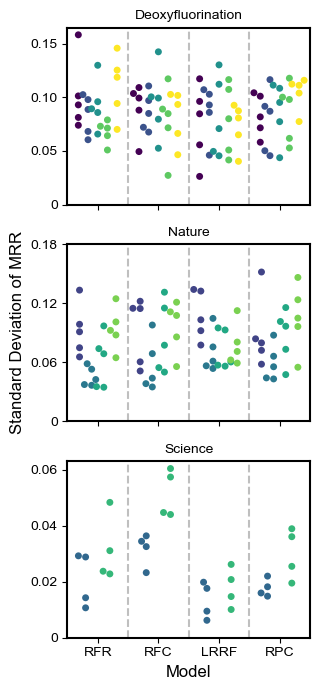

In [33]:
fig, ax = plt.subplots(nrows=3, figsize=(3.3, 7), sharex=True, tight_layout=True)

desc_m1_deoxy_perf_df = m1_desc_analyzer.deoxy_perf_df
desc_m1_deoxy_perf_df["sulfonyl_fluoride"] = [i//1600 + 1 for i in range(desc_m1_deoxy_perf_df.shape[0])]
mean_rr_df = desc_m1_deoxy_perf_df.groupby([
    "model", "test_compound", "evaluation_loop", "sulfonyl_fluoride"
])["reciprocal_rank"].mean().reset_index() # Average across each CV test fold
m1_deoxy_var_df = mean_rr_df.groupby([
    "model", "test_compound", "sulfonyl_fluoride"
])["reciprocal_rank"].std().reset_index() # Standard deviation across each random mask
sub_m1_deoxy_df = m1_deoxy_var_df[m1_deoxy_var_df["model"].isin(rf_models)]
sns.swarmplot(
    sub_m1_deoxy_df, 
    x="model", y="reciprocal_rank", hue="sulfonyl_fluoride", dodge=True,
    palette="viridis", order=rf_models,
    ax=ax[0], legend=False
)

m1_nature_dfs = [m1_desc_analyzer.amide_perf_df, m1_desc_analyzer.amine_perf_df, m1_desc_analyzer.sulfon_perf_df, m1_desc_analyzer.thiol_perf_df]
nature_datasets = ["Amide", "Amine", "Sulfonamide", "Thiol"]

m1_nature_var_dfs = []
for m1_df, name in zip(m1_nature_dfs, nature_datasets) : 
    mean_rr_df = m1_df.groupby(["model", "test_compound", "evaluation_loop"])["reciprocal_rank"].mean().reset_index()
    var_df = mean_rr_df.groupby(["model", "test_compound"])["reciprocal_rank"].std().reset_index()
    var_df["dataset"] = [name] * var_df.shape[0]
    m1_nature_var_dfs.append(var_df)

m1_nature_var_df = pd.concat(m1_nature_var_dfs)
sns.swarmplot(
    m1_nature_var_df[m1_nature_var_df["model"].isin(rf_models)], 
    x="model", y="reciprocal_rank", hue="dataset", dodge=True,palette="viridis", order=rf_models,
    ax=ax[1], legend=False
)

science_datasets = ["whole_amine", "whole_bromide"]
m1_science_dfs = [m1_desc_analyzer.whole_amine_perf_df, m1_desc_analyzer.whole_bromide_perf_df]

m1_science_var_dfs = []
for m1_df, name in zip(m1_science_dfs, science_datasets) : 
    mean_rr_df = m1_df.groupby(["model", "test_compound", "evaluation_loop"])["reciprocal_rank"].mean().reset_index()
    var_df = mean_rr_df.groupby(["model", "test_compound"])["reciprocal_rank"].std().reset_index()
    var_df["dataset"] = [name] * var_df.shape[0]
    m1_science_var_dfs.append(var_df)

m1_science_var_df = pd.concat(m1_science_var_dfs)
sns.swarmplot(
    m1_science_var_df[m1_science_var_df["model"].isin(rf_models)], 
    x="model", y="reciprocal_rank", hue="dataset", dodge=True,palette="viridis", order=rf_models,
    ax=ax[2], legend=False
)

ax[0].set_yticks([0, 0.05, 0.10, 0.15])
ax[0].set_yticklabels([0, 0.05, "0.10", 0.15], fontdict={"fontfamily":"arial", "fontsize":10})
ax[1].set_yticks([0, 0.06, 0.12, 0.18])
ax[1].set_yticklabels([0, 0.06, 0.12, 0.18], fontdict={"fontfamily":"arial", "fontsize":10})
ax[2].set_yticks([0, 0.02, 0.04, 0.06])
ax[2].set_yticklabels([0, 0.02, 0.04, 0.06], fontdict={"fontfamily":"arial", "fontsize":10})

datasets = ["Deoxyfluorination", "Nature", "Science"]
for i in range(3):
    ax[i].set_title(datasets[i], fontdict={"fontfamily":"arial", "fontsize":10})
    if i!= 1 :
        ax[i].set_ylabel("")
    else :
        ax[i].set_ylabel("Standard Deviation of MRR", fontdict={"fontfamily":"arial", "fontsize":12})
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[i].spines[axis].set_linewidth(1.5)
    for j in range(1,4):
        ax[i].axvline(j-0.5, 0, 1, c="grey", ls="--", alpha=0.5)
ax[2].set_xlabel("Model", fontdict={"fontfamily":"arial", "fontsize":12})    
ax[2].set_xticklabels(rf_models, fontdict={"fontfamily":"arial", "fontsize":10})    

In [34]:
desc_m2_deoxy_perf_df = m2_desc_analyzer.deoxy_perf_df
new_comp_starts_at = [0]
rfr_inds = desc_m2_deoxy_perf_df[desc_m2_deoxy_perf_df["model"]=="RFR"].index.tolist()
for i, ind in enumerate(rfr_inds) :
    if i> 0 :
        if ind - rfr_inds[i-1] > 1 :
            new_comp_starts_at.append(ind)
print("NEW COMPOUND STARTS", new_comp_starts_at)

NEW COMPOUND STARTS [0, 1600, 3200, 4800, 6400]


/var/folders/05/jxqj_ld96mx38n9knzsjp58c0000gn/T/ipykernel_1434/3415722944.py:70: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(rf_models, fontdict={"fontfamily":"arial", "fontsize":10})


[Text(0, 0, 'RFR'), Text(1, 0, 'RFC'), Text(2, 0, 'LRRF'), Text(3, 0, 'RPC')]

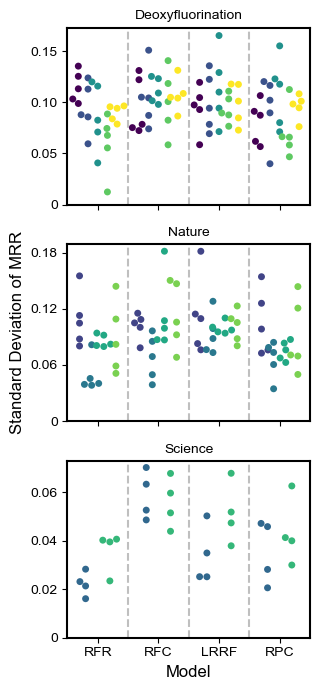

In [35]:
fig, ax = plt.subplots(nrows=3, figsize=(3.3, 7), sharex=True, tight_layout=True)

desc_m2_deoxy_perf_df["sulfonyl_fluoride"] = [i//1600 + 1 for i in range(desc_m2_deoxy_perf_df.shape[0])]
mean_rr_df = desc_m2_deoxy_perf_df.groupby([
    "model", "test_compound", "evaluation_loop", "sulfonyl_fluoride"
])["reciprocal_rank"].mean().reset_index() # Average across each CV test fold
m2_deoxy_var_df = mean_rr_df.groupby([
    "model", "test_compound", "sulfonyl_fluoride"
])["reciprocal_rank"].std().reset_index() # Standard deviation across each random mask
sub_m2_deoxy_df = m2_deoxy_var_df[m2_deoxy_var_df["model"].isin(rf_models)]
sns.swarmplot(
    sub_m2_deoxy_df, 
    x="model", y="reciprocal_rank", hue="sulfonyl_fluoride", dodge=True,
    palette="viridis", order=rf_models,
    ax=ax[0], legend=False
)

m2_nature_dfs = [m2_desc_analyzer.amide_perf_df, m2_desc_analyzer.amine_perf_df, m2_desc_analyzer.sulfon_perf_df, m2_desc_analyzer.thiol_perf_df]
nature_datasets = ["Amide", "Amine", "Sulfonamide", "Thiol"]

m2_nature_var_dfs = []
for m2_df, name in zip(m2_nature_dfs, nature_datasets) : 
    mean_rr_df = m2_df.groupby(["model", "test_compound", "evaluation_loop"])["reciprocal_rank"].mean().reset_index()
    var_df = mean_rr_df.groupby(["model", "test_compound"])["reciprocal_rank"].std().reset_index()
    var_df["dataset"] = [name] * var_df.shape[0]
    m2_nature_var_dfs.append(var_df)

m2_nature_var_df = pd.concat(m2_nature_var_dfs)
sns.swarmplot(
    m2_nature_var_df[m2_nature_var_df["model"].isin(rf_models)], 
    x="model", y="reciprocal_rank", hue="dataset", dodge=True,palette="viridis", order=rf_models,
    ax=ax[1], legend=False
)

m2_science_dfs = [m2_desc_analyzer.whole_amine_perf_df, m2_desc_analyzer.whole_bromide_perf_df]

m2_science_var_dfs = []
for m2_df, name in zip(m2_science_dfs, science_datasets) : 
    mean_rr_df = m2_df.groupby(["model", "test_compound", "evaluation_loop"])["reciprocal_rank"].mean().reset_index()
    var_df = mean_rr_df.groupby(["model", "test_compound"])["reciprocal_rank"].std().reset_index()
    var_df["dataset"] = [name] * var_df.shape[0]
    m2_science_var_dfs.append(var_df)

m2_science_var_df = pd.concat(m2_science_var_dfs)
sns.swarmplot(
    m2_science_var_df[m2_science_var_df["model"].isin(rf_models)], 
    x="model", y="reciprocal_rank", hue="dataset", dodge=True,palette="viridis", order=rf_models,
    ax=ax[2], legend=False
)

ax[0].set_yticks([0, 0.05, 0.10, 0.15])
ax[0].set_yticklabels([0, 0.05, "0.10", 0.15], fontdict={"fontfamily":"arial", "fontsize":10})
ax[1].set_yticks([0, 0.06, 0.12, 0.18])
ax[1].set_yticklabels([0, 0.06, 0.12, 0.18], fontdict={"fontfamily":"arial", "fontsize":10})
ax[2].set_yticks([0, 0.02, 0.04, 0.06])
ax[2].set_yticklabels([0, 0.02, 0.04, 0.06], fontdict={"fontfamily":"arial", "fontsize":10})

datasets = ["Deoxyfluorination", "Nature", "Science"]
for i in range(3):
    ax[i].set_title(datasets[i], fontdict={"fontfamily":"arial", "fontsize":10})
    if i!= 1 :
        ax[i].set_ylabel("")
    else :
        ax[i].set_ylabel("Standard Deviation of MRR", fontdict={"fontfamily":"arial", "fontsize":12})
    for axis in ['top', 'bottom', 'left', 'right']:
        ax[i].spines[axis].set_linewidth(1.5)
    for j in range(1,4):
        ax[i].axvline(j-0.5, 0, 1, c="grey", ls="--", alpha=0.5)
ax[2].set_xlabel("Model", fontdict={"fontfamily":"arial", "fontsize":12})    
ax[2].set_xticklabels(rf_models, fontdict={"fontfamily":"arial", "fontsize":10})    

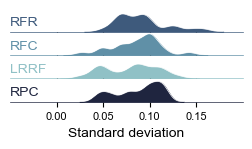

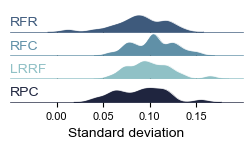

In [36]:
std_sub_m1_deoxy = sub_m1_deoxy_df.rename(columns={"reciprocal_rank":"std"})
plot_std_kde_plot(std_sub_m1_deoxy, rf_models, save="Figure5B_deoxy1.svg")

std_sub_m2_deoxy = sub_m2_deoxy_df.rename(columns={"reciprocal_rank":"std"})
plot_std_kde_plot(std_sub_m2_deoxy, rf_models, save="Figure5B_deoxy2.svg")

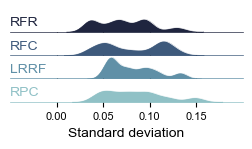

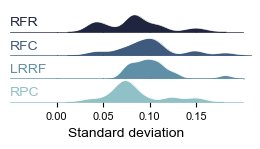

In [37]:
std_sub_m1_nature = m1_nature_var_df.rename(columns={"reciprocal_rank":"std"})
std_sub_m2_nature = m2_nature_var_df.rename(columns={"reciprocal_rank":"std"})
plot_std_kde_plot(std_sub_m1_nature, rf_models, save="Figure5B_nature1_FINAL.svg")
plot_std_kde_plot(std_sub_m2_nature, rf_models, save="Figure5B_nature2_FINAL.svg")

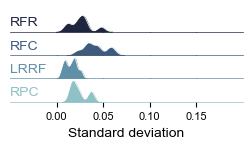

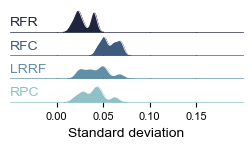

In [39]:
std_sub_m1_science = m1_science_var_df.rename(columns={"reciprocal_rank":"std"})
std_sub_m2_science = m2_science_var_df.rename(columns={"reciprocal_rank":"std"})
plot_std_kde_plot(std_sub_m1_science, rf_models, save="Figure5B_science1.svg") #xlim=(-0.025, 0.075), xticks=[0, 0.025, 0.050, 0.075], 
plot_std_kde_plot(std_sub_m2_science, rf_models, save="Figure5B_science2.svg") #xlim=(-0.025, 0.075), xticks=[0, 0.025, 0.050, 0.075], 

# Datasets with more than 10 conditions

## Complete

In [2]:
rf_models = ["Baseline", "RFR", "RFC", "LRRF", "RPC"]
clean_dataset_names = ["C-H Borylation", "Nickel-Photoredox\n(1.5 equiv. amine)", "Nickel-Photoredox\n(3.0 equiv. amine)", "Aryl Halide Borylation\nin EtOH", "Aryl Halide Borylation\nin MeOH", "Ullmann"]
### Combining Borylation and Informer using FP and Ullmann and aryl borylation using descriptors
fp_analyzer2 = MoreConditionAnalyzer("fp", ["informer", "borylation"], rf_models)
fp_perf_df2 = fp_analyzer2.avg_perf_df

In [3]:
desc_analyzer2 = MoreConditionAnalyzer("desc", ["ullmann", "aryl_borylation"], rf_models)
desc_perf_df2 = desc_analyzer2.avg_perf_df

perf_df2_comb = pd.concat([fp_perf_df2, desc_perf_df2], ignore_index=True)
rr_table2, kt_table2, mrr_table2 = get_rr_kt_tables(perf_df2_comb, rf_models)

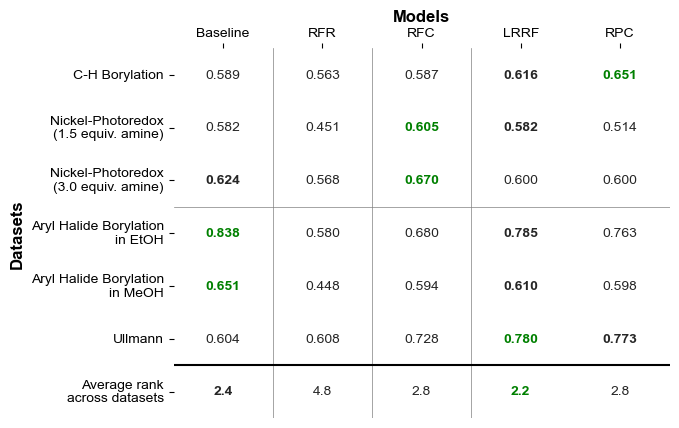

In [4]:
datasets_ordered = ["Borylation", "Informer 1", "Informer 2", "Aryl Borylation in EtOH", "Aryl Borylation in MeOH", "Ullmann"]
plot_table_with_heatmap(
    rr_table2.reindex(datasets_ordered), 
    rf_models, 
    clean_dataset_names, 
    hline_pos=[3], last_hline=6, vline_pos=[1,2,3],
    save="FigureS29.svg"
)

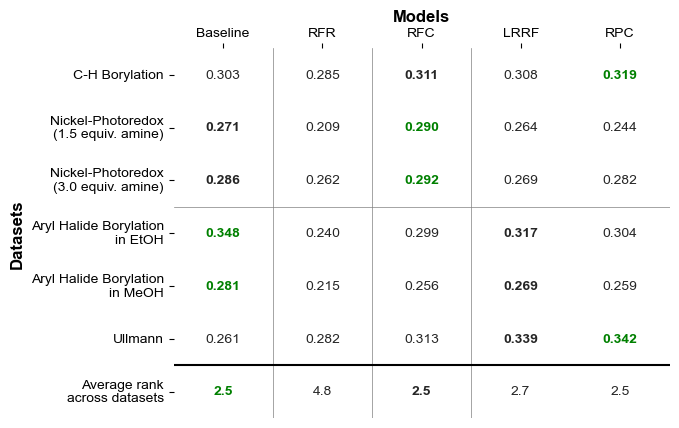

In [5]:
plot_table_with_heatmap(
    mrr_table2.reindex(datasets_ordered), 
    rf_models, 
    clean_dataset_names, 
    hline_pos=[3], last_hline=6, vline_pos=[1,2,3],
    save="FigureS30.svg"
)

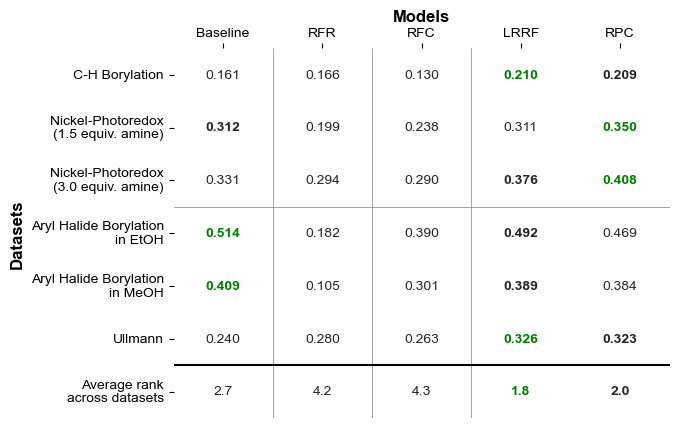

In [6]:
plot_table_with_heatmap(
    kt_table2.reindex(datasets_ordered), 
    rf_models, 
    clean_dataset_names, 
    hline_pos=[3], last_hline=6, vline_pos=[1,2,3],
    save="FigureS31.svg"
)

In [10]:
def plot_differences(
        control_name, 
        control_table_list, 
        feature_table_list=[rr_table2, mrr_table2, kt_table2], 
        dataset_names=clean_dataset_names, 
        filename=None,
        width=6
    ):
    diffs = [x - y for x, y in zip(feature_table_list, control_table_list)]
    diffs = [pd.melt(x.iloc[:, 1:], ignore_index=False, value_name="feature - onehot").reset_index() for x in diffs]

    fig, ax = plt.subplots(figsize=(width,9.5), nrows=3, sharex=True)
    metrics = ["MRR", "AverageMRR", "Kendall-tau"]
    for i, diff_table in enumerate(diffs):
        sns.barplot(diff_table, x="dataset", y="feature - onehot", hue="model", palette="viridis", ax=ax[i])
        ax[i].axhline(0, 0, 1, c="k")
        ax[i].set_yticks(ax[i].get_yticks())
        ax[i].set_yticklabels(ax[i].get_yticklabels(), fontdict={"fontfamily":"arial", "fontsize":6})
        ax[i].set_ylabel(metrics[i], fontdict={"fontfamily":"arial", "fontsize":8})
        if i == 0 :
            ax[i].set_title(f"Feature - {control_name[0].upper() + control_name[1:]}", fontdict={"fontfamily":"arial", "fontsize":8, "fontweight":"bold"})
            ax[i].legend(loc='upper left', fontsize=6, prop={"size":6, "family":"arial"})
            ax[i].set(xlabel=None)
        elif i == 2 :
            ax[i].get_legend().remove()
            ax[i].set_xticklabels(dataset_names, rotation=45, fontdict={"fontfamily":"arial", "fontsize":6})
            ax[i].set_xlabel("Dataset", fontdict={"fontfamily":"arial", "fontsize":8})
        else :
            ax[i].get_legend().remove()
            ax[i].set(xlabel=None)
        for j in range(len(dataset_names)) :
            ax[i].axvline(j+0.5, 0, 1, ls="--", c="grey", alpha=0.5)
        for axis in ["top", "bottom", "left", "right"]:
            ax[i].spines[axis].set_linewidth(2)

    if filename is not None:
        plt.savefig(f"figures/SI/{filename}.svg", dpi=300, format="svg")

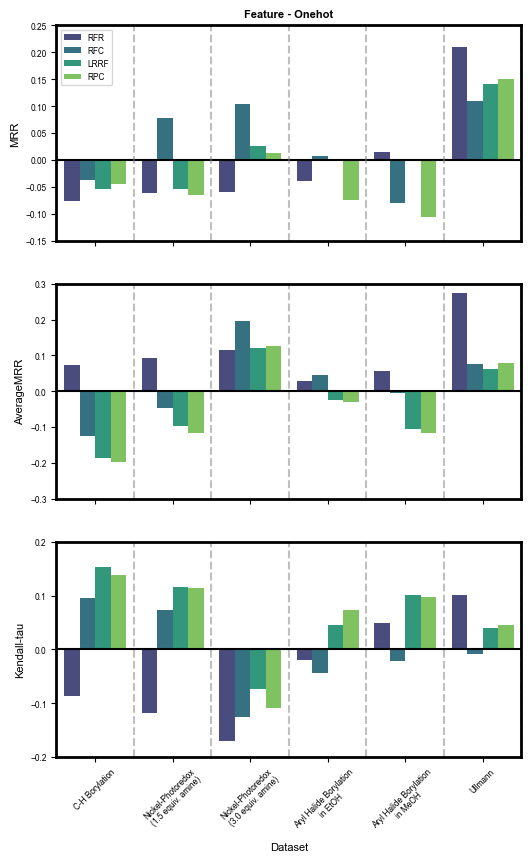

In [11]:
ohe_analyzer2 = MoreConditionAnalyzer("onehot", ["informer", "borylation", "ullmann", "aryl_borylation"], rf_models)
ohe_perf_df2 = ohe_analyzer2.avg_perf_df

plot_differences("onehot", [*get_rr_kt_tables(ohe_perf_df2, rf_models)], filename="FigureS32")

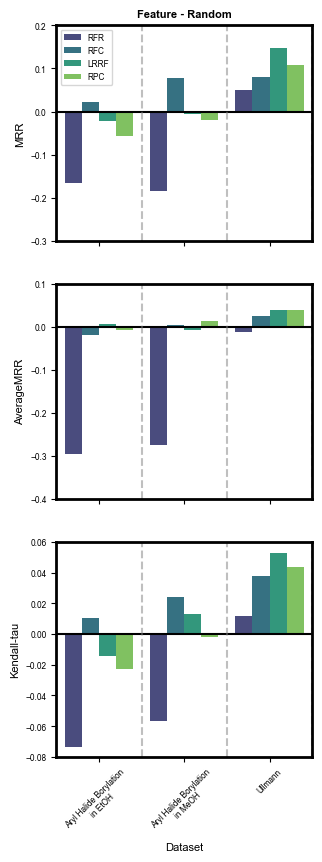

In [12]:
rand_analyzer2 = MoreConditionAnalyzer("random", ["ullmann", "aryl_borylation"], rf_models)
rand_perf_df2 = rand_analyzer2.avg_perf_df

plot_differences("random", [*get_rr_kt_tables(rand_perf_df2, rf_models)], feature_table_list=[*get_rr_kt_tables(desc_perf_df2, rf_models)], dataset_names=clean_dataset_names[-3:], width=3.3, filename="FigureS33")

## Further analysis on Ullmann

### RFR

In [2]:
# Evaluating whether ullmann CV are the same btw rfr and lrrf
from new_executor import *
n_rxns = 4
n_outer_splits = 4
ranking_dataset, regressor_dataset = UllmannDataset(False, n_rxns), UllmannDataset(True, n_rxns)
outer_ps_array, outer_ps = prepare_stratified_kfold_by_top_condition(ranking_dataset.X_fp, ranking_dataset.y_ranking, n_outer_splits)

rfr_ps = PredefinedSplit(np.repeat(outer_ps_array, ranking_dataset.y_ranking.shape[1]))

OUTER PS ARRAY [0. 2. 1. 2. 3. 3. 0. 0. 3. 0. 1. 1. 1. 2. 3. 0. 3. 1. 0. 2. 2. 2. 1. 1.
 3. 3. 0. 2.]


In [3]:
# Gathering the actual models and looking at prediction quality

from sklearn.metrics import r2_score, mean_absolute_error

gcv = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid={
        "n_estimators": [30, 100, 200],
        "max_depth": [5, 10, None],
    },
    scoring="r2",
    n_jobs=-1,
    cv=4,
)
best_models = []
actual_yields = []
predicted_yields = []

for i, (train_ind, test_ind) in enumerate(rfr_ps.split()) :
    X_train, X_test = regressor_dataset.X_desc[train_ind], regressor_dataset.X_desc[test_ind]
    std = StandardScaler()
    X_train = std.fit_transform(X_train)
    X_test = std.transform(X_test)
    y_train, y_test = regressor_dataset.y_yield[train_ind], regressor_dataset.y_yield[test_ind]
    if i == 0 :
        print(X_test.shape)
    gcv.fit(X_train, y_train)
    best_models.append(gcv.best_estimator_)
    actual_yields.append(y_test)
    pred = gcv.predict(X_test)
    predicted_yields.append(pred)
    print(f"FOLD {i+1}: R2={round(r2_score(y_test, pred), 3)}, MAE={round(mean_absolute_error(y_test, pred), 1)}")

(126, 574)
FOLD 1: R2=0.395, MAE=10.4
FOLD 2: R2=-0.204, MAE=8.3
FOLD 3: R2=-1.178, MAE=18.9
FOLD 4: R2=0.191, MAE=13.8


In [12]:
best_models

[RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42),
 RandomForestRegressor(max_depth=5, n_estimators=30, random_state=42),
 RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42),
 RandomForestRegressor(max_depth=5, n_estimators=200, random_state=42)]

0.6814790082301313
[  0   2   3   1  12  15  14 128  13 573]
0.7039862919894148
[  1   0 113   3 114  61 573  62 231 423]
0.6861200508801459
[158 159 156 157  62  58  59  63  61 173]
0.6586683837274792
[233 373 369 232 549 262 341 361 240 306]


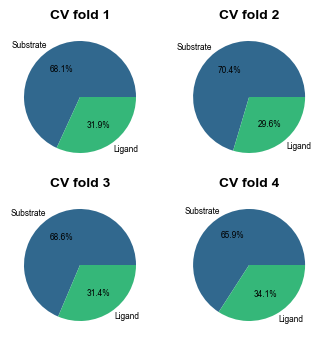

In [15]:
fig, ax = plt.subplots(figsize=(4, 4), nrows=2, ncols=2)
for i in range(4):
    feature_importance = best_models[i].feature_importances_
    substrate_importance = np.sum(feature_importance[:regressor_dataset.amine_desc.shape[1]+regressor_dataset.arbr_desc.shape[1]-4])
    print(substrate_importance)
    print(np.argsort(feature_importance)[::-1][:10])
    ax[i//2, i%2].pie(
        [substrate_importance, 1-substrate_importance], 
        labels=["Substrate", "Ligand"], 
        autopct='%1.1f%%',
        textprops={"fontfamily":"arial", "fontsize":6},
        colors=["#31688e", "#35b779"]
    )
    ax[i//2, i%2].set_title(f"CV fold {i+1}", fontdict={"fontfamily":"arial", "fontsize":10, "fontweight":"bold"})
plt.savefig(f"figures/SI/FigureS35.svg", dpi=300, format="svg")

In [5]:
def yield_to_rank_with_ties(yield_array):
    copy = deepcopy(yield_array)
    if copy.ndim == 1 :
        copy = np.expand_dims(copy, 0)
    raw_rank = copy.shape[1] + 1 - rankdata(copy, axis=1)
    for i, row in enumerate(copy):
        raw_rank[i, np.where(row == 0)[0]] = 25 # penalize for picking 0% yielding reaction
    return raw_rank

### Confirming that the results are the same as when running new_executor.py
for i, (actual_test_yields, predicted_test_yields) in enumerate(zip(actual_yields, predicted_yields)) :
    y_test_reshape = actual_test_yields.reshape((len(actual_test_yields)//18, 18))
    y_pred_reshape = predicted_test_yields.reshape((len(predicted_test_yields)//18, 18))
    pred_ranks = yield_to_ranking(y_pred_reshape)
    test_ranks = yield_to_rank_with_ties(y_test_reshape)
    kt = np.array([
        round(kendalltau(test_ranks[i, :], pred_ranks[i, :]).statistic, 3)
        for i in range(pred_ranks.shape[0])
    ])
    predicted_highest_yield_inds = np.argpartition(
        pred_ranks, 4, axis=1
    )[:, : 4]
    best_retrieved_yield = [
        np.max(y_test_reshape[i, row])
        for i, row in enumerate(predicted_highest_yield_inds)
    ]
    actual_inds_with_that_yield = [
        np.where(y_test_reshape[i, :] == best_y)[0]
        for i, best_y in enumerate(best_retrieved_yield)
    ]
    rr = np.array([
        round(1 / np.min(test_ranks[a, x]), 3)
        for a, x in enumerate(actual_inds_with_that_yield)
    ])
    mrr = np.array([
        round(np.mean(np.reciprocal(test_ranks[a, row])), 3)
        for a, row in enumerate(predicted_highest_yield_inds)
    ])

    all_perfs = pd.read_excel("performance_excels/ullmann/desc_None_None.xlsx")
    sub_df = all_perfs[(all_perfs["model"]=="RFR") & (all_perfs["test_compound"]==i)]
    sub_df_rr = np.array([round(x,3) for x in sub_df["reciprocal_rank"]])
    sub_df_mrr = np.array([round(x,3) for x in sub_df["mean_reciprocal_rank"]])
    sub_df_kt = np.array([round(x,3) for x in sub_df["kendall_tau"]])

    assert np.all(sub_df_rr == rr)
    assert np.all(sub_df_mrr == mrr)
    assert np.all(sub_df_kt == kt)


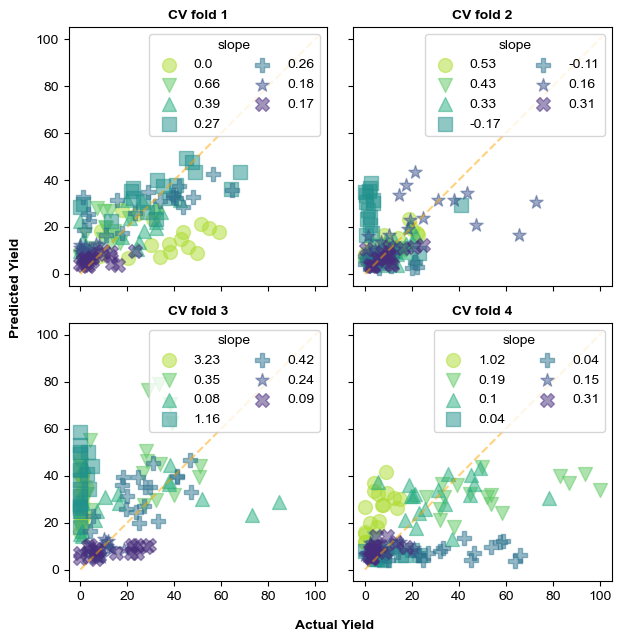

In [6]:
from sklearn.linear_model import LinearRegression


fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, tight_layout=True, figsize=(6.5, 6.5))
markers = ["o", "v", "^", "s", "P", "*", "X"]
colors = [x for i, x in enumerate(sns.color_palette("viridis", 7)[::-1]) if i in range(7)]

for i, (act_y, pred_y) in enumerate(zip(actual_yields, predicted_yields)) :
    for j in range(7) :
        y = predicted_yields[i][18*j : 18*(j+1)]
        x = actual_yields[i][18*j : 18*(j+1)]
        reg = LinearRegression().fit(x.reshape(-1, 1), y)
        slope = round(reg.coef_[0], 2)
        if slope == 0 :
            slope = 0.00
        ax[i//2, i%2].scatter(act_y[18*j : 18*(j+1)], pred_y[18*j : 18*(j+1)], c=colors[j], marker=markers[j], s=100,alpha=0.5, label=slope)
    
    ax[i//2, i%2].plot(np.arange(0,102),  np.arange(0,102), c="orange", ls="--", alpha=0.5)
    ax[i//2, i%2].legend(loc="upper right", ncols=2, prop={"family":"arial"}, fontsize=10, title="slope", title_fontproperties={"family":"arial", "size":10})

    ax[i//2, i%2].set_title(f"CV fold {i+1}", fontdict={"fontfamily":"arial", "fontsize":10, "fontweight":"bold"})
    ax[i//2, i%2].set_aspect("equal")
    ax[i//2, i%2].set_xlim(-5,105)
    ax[i//2, i%2].set_ylim(-5,105)
    ax[i//2, i%2].set_xticks(20*np.arange(6))
    ax[i//2, i%2].set_yticks(20*np.arange(6))
    ax[i//2, i%2].set_xticklabels([round(x) for x in 20*np.arange(6)], fontdict={"fontfamily":"arial", "fontsize":10})
    ax[i//2, i%2].set_yticklabels([round(x) for x in 20*np.arange(6)], fontdict={"fontfamily":"arial", "fontsize":10})
fig.supxlabel("Actual Yield", x=0.53,y=0.02, size=10, weight="bold", fontdict={"fontfamily":"arial"})
fig.supylabel("Predicted Yield", x=0.03, y=0.55, size=10, weight="bold", fontdict={"fontfamily":"arial"})
plt.savefig(f"figures/SI/FigureS34.svg", dpi=300, format="svg")

Actual span 15.136800179446572
Predicted span 29.90043389468788
Actual span 95.98473581601128
Predicted span 30.115898831732512
Actual span 73.08231575536995
Predicted span 30.210128862192683
Actual span 65.31382927395858
Predicted span 9.563526978804713


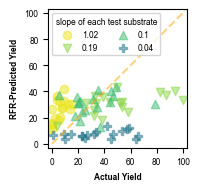

In [7]:
fig, ax = plt.subplots(figsize=(1.8, 1.8))
markers = ["o", "v", "^", "s", "P", "*", "X"]
colors = [x for i, x in enumerate(sns.color_palette("viridis", 28)[::-1]) if i in range(28)]
for j in range(7) :
    if j not in [3, 5, 6]:
        y = predicted_yields[3][18*j : 18*(j+1)]
        x = actual_yields[3][18*j : 18*(j+1)]
        print("Actual span", max(x)-min(x))
        print("Predicted span", max(y)-min(y))
        reg = LinearRegression().fit(x.reshape(-1, 1), y)
        slope = round(reg.coef_[0], 2)
        ax.scatter(x, y, c=colors[4*j], alpha=0.5, marker=markers[j], label=slope)

ax.plot(np.arange(0,103),  np.arange(0,103), c="orange", ls="--", alpha=0.5)
ax.legend(loc="upper left", ncols=2, fontsize=6, title="slope of each test substrate", title_fontproperties={"family":"arial", "size":6}, prop={"family":"arial", "size":6})
ax.set_xlim(-3,103)
ax.set_ylim(-3,103)
ax.set_xticks(20*np.arange(6))
ax.set_yticks(20*np.arange(6))
ax.set_xticklabels([round(x) for x in 20*np.arange(6)], fontdict={"fontfamily":"arial", "fontsize":6})
ax.set_yticklabels([round(x) for x in 20*np.arange(6)], fontdict={"fontfamily":"arial", "fontsize":6})
ax.set_xlabel("Actual Yield", fontdict={"fontfamily":"arial", "fontweight":"bold", "fontsize":6})
ax.set_ylabel("RFR-Predicted Yield", fontdict={"fontfamily":"arial", "fontweight":"bold", "fontsize":6})
ax.set_aspect("equal")
plt.savefig(f"figures/Figure6B_final.svg", dpi=300, format="svg")

### LRRF

In [8]:
import matplotlib
### Plotting the dependence of performance on 
### the number of training instances that shared the top ligand
perf_excel = pd.read_excel("performance_excels/ullmann/desc_None_None.xlsx")

array_to_plot = np.zeros((4,7))

lrrf_top_mrr = perf_excel[perf_excel["model"]=="LRRF"]["reciprocal_rank"].to_list()
# print(lrrf_top_mrr.to_list())
total_count = 0
info_to_plot = {
    "num train":[],
    "Average":[],
    "Borda":[]
}
for i, (train_ind, test_ind) in enumerate(outer_ps.split()) :
    X_train, X_test = ranking_dataset.X_desc[train_ind], ranking_dataset.X_desc[test_ind]
    y_train, y_test = ranking_dataset.y_ranking[train_ind], ranking_dataset.y_ranking[test_ind]
    y_test_yield = ranking_dataset.y_yield[test_ind]
    y_test_rank_with_ties = yield_to_rank_with_ties(y_test_yield)
    
    std = StandardScaler()
    X_train = std.fit_transform(X_train)
    X_test = std.transform(X_test)

    lrrf = GridSearchCV(
            LabelRankingRandomForest(),
            param_grid={
                "n_estimators": [25, 50, 100],
                "max_depth": [4, 6, 8],
            },
            scoring=kt_score,
            cv=4,
            n_jobs=-1,
        )
    lrrf.fit(X_train, y_train)

    ### Confirming that the results are reproduced
    pred_ranks = lrrf.predict(X_test)
    kt = np.array([
        round(kendalltau(y_test_rank_with_ties[i, :], pred_ranks[i, :]).statistic, 3)
        for i in range(pred_ranks.shape[0])
    ])
    predicted_highest_yield_inds = np.argpartition(
        pred_ranks, 4, axis=1
    )[:, : 4]
    best_retrieved_yield = [
        np.max(y_test_yield[i, row])
        for i, row in enumerate(predicted_highest_yield_inds)
    ]
    actual_inds_with_that_yield = [
        np.where(y_test_yield[i, :] == best_y)[0]
        for i, best_y in enumerate(best_retrieved_yield)
    ]
    rr = np.array([
        round(1 / np.min(y_test_rank_with_ties[a, x]), 3)
        for a, x in enumerate(actual_inds_with_that_yield)
    ])
    mrr = np.array([
        round(np.mean(np.reciprocal(y_test_rank_with_ties[a, row])), 3)
        for a, row in enumerate(predicted_highest_yield_inds)
    ])
    all_perfs = pd.read_excel("performance_excels/ullmann/desc_None_None.xlsx")
    sub_df = all_perfs[(all_perfs["model"]=="LRRF") & (all_perfs["test_compound"]==i)]
    sub_df_rr = np.array([round(x,3) for x in sub_df["reciprocal_rank"]])
    sub_df_mrr = np.array([round(x,3) for x in sub_df["mean_reciprocal_rank"]])
    sub_df_kt = np.array([round(x,3) for x in sub_df["kendall_tau"]])
    assert np.all(sub_df_rr == rr)
    assert np.all(sub_df_mrr == mrr)
    assert np.all(sub_df_kt == kt)

    train_leaf_inds = lrrf.best_estimator_.model.apply(X_train)
    test_leaf_inds = lrrf.best_estimator_.model.apply(X_test)
    
    borda_ranks = lrrf.best_estimator_.borda_by_tree_and_leaf
    test_best_ligands = np.where(y_test == 1)[1]
    train_best_ligands = np.where(y_train == 1)[1]
    
    for j, ligand in enumerate(test_best_ligands) :
        # For each test substrate
        # look at the correlation between 
        #       1) the number of this ligand being the best in training substrates
        #     & 2) the quality of the selection from LRRF
        num_shared = len(np.where(train_best_ligands == ligand)[0])
        best_rank = int(1/lrrf_top_mrr[total_count])
        if best_rank > 4 :
            best_rank_for_record = 4
        else:
            best_rank_for_record = best_rank
        array_to_plot[best_rank_for_record-1, num_shared] += 1
        total_count += 1

        # Looking at the impact of rank aggregation
        test_leaves = test_leaf_inds[j] # index : tree number / value : leaf index
        train_instances_sharing_best_ligand = np.where(train_best_ligands == ligand)[0]
        greater_than_one = 0
        portion = 0
        ranks = 0
        rank_arrays = []
        train_avg_rank = []
        for tree_num, leaf_num in enumerate(test_leaves) : 
            train_instances_in_same_leaf = np.where(train_leaf_inds[:, tree_num] == leaf_num)[0]
            # Portion of the training substrates that landed on the same leaf as the test substrate
            # that share the same best ligand
            portion += np.sum(np.in1d(train_instances_sharing_best_ligand, train_instances_in_same_leaf)) / len(train_instances_in_same_leaf)

            # Rank output AFTER the FIRST Borda ranking aggregation
            ranks += borda_ranks[tree_num][leaf_num][0, ligand]
            rank_arrays.append(borda_ranks[tree_num][leaf_num].flatten())
            if np.sum(np.in1d(train_instances_sharing_best_ligand, train_instances_in_same_leaf)) > 0 :
                greater_than_one += 1
            # Rank BEFORE the first Borda ranking aggregation
            train_avg_rank.append(np.mean(y_train[train_instances_in_same_leaf, ligand]))

        info_to_plot["num train"].append(num_shared)
        info_to_plot["Average"].append(np.mean(np.array(train_avg_rank)))
        info_to_plot["Borda"].append(list(np.argsort(np.mean(np.vstack(rank_arrays), axis=0))).index(ligand)+1)
        print("FOLD", i, "COMPOUND", j)
        print("Best rank out of LRRF's selections:", best_rank)
        print("Number of training substrates with same best ligand:", num_shared)
        print("Number of trees where there was one or more training substrates sharing best ligand:", greater_than_one)
        print("Average portion of training substrates landing on the same leaf node:", round(portion/(tree_num+1), 2))
        print("Average rank of train instances in same leaf:", round(np.mean(np.array(train_avg_rank)), 2))
        print("Best ligand's rank within AVERAGE rank after first aggregation", list(np.argsort(np.mean(np.vstack(rank_arrays), axis=0))).index(ligand))
        print("Average rank after first aggregation", round(ranks/(tree_num+1), 2))
        print("Final rank", borda_count(np.expand_dims(np.vstack(rank_arrays).T, axis=0))[0][ligand])
        print()

FOLD 0 COMPOUND 0
Best rank out of LRRF's selections: 3
Number of training substrates with same best ligand: 0
Number of trees where there was one or more training substrates sharing best ligand: 0
Average portion of training substrates landing on the same leaf node: 0.0
Average rank of train instances in same leaf: 9.73
Best ligand's rank within AVERAGE rank after first aggregation 7
Average rank after first aggregation 9.12
Final rank 8

FOLD 0 COMPOUND 1
Best rank out of LRRF's selections: 1
Number of training substrates with same best ligand: 2
Number of trees where there was one or more training substrates sharing best ligand: 1
Average portion of training substrates landing on the same leaf node: 0.01
Average rank of train instances in same leaf: 3.95
Best ligand's rank within AVERAGE rank after first aggregation 0
Average rank after first aggregation 2.68
Final rank 1

FOLD 0 COMPOUND 2
Best rank out of LRRF's selections: 1
Number of training substrates with same best ligand: 6


FOLD 2 COMPOUND 0
Best rank out of LRRF's selections: 7
Number of training substrates with same best ligand: 1
Number of trees where there was one or more training substrates sharing best ligand: 38
Average portion of training substrates landing on the same leaf node: 0.18
Average rank of train instances in same leaf: 8.18
Best ligand's rank within AVERAGE rank after first aggregation 5
Average rank after first aggregation 7.69
Final rank 6

FOLD 2 COMPOUND 1
Best rank out of LRRF's selections: 1
Number of training substrates with same best ligand: 6
Number of trees where there was one or more training substrates sharing best ligand: 61
Average portion of training substrates landing on the same leaf node: 0.5
Average rank of train instances in same leaf: 5.31
Best ligand's rank within AVERAGE rank after first aggregation 0
Average rank after first aggregation 4.6
Final rank 1

FOLD 2 COMPOUND 2
Best rank out of LRRF's selections: 4
Number of training substrates with same best ligand: 3

Text(0.5, -12.777777777777782, "Best rank of\n LRRF's selections")

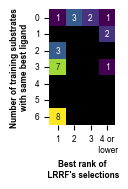

In [9]:
fig, ax = plt.subplots(figsize=(3.2, 1.5))
mask = array_to_plot == 0
cmap = matplotlib.colormaps.get_cmap('viridis')
cmap.set_bad("k")
sns.heatmap(array_to_plot.T, annot=True, mask=mask.T, cmap=cmap, cbar=False, square=True, annot_kws={"fontfamily":"arial", "fontsize":6})
ax.set_xticklabels([1,2,3,"4 or\n lower"], rotation=0, fontdict={"fontfamily":"arial", "fontsize":6})
ax.set_yticklabels(np.arange(7), rotation=0, fontdict={"fontfamily":"arial", "fontsize":6})
ax.set_ylabel("Number of training substrates\nwith same best ligand", fontdict={"fontfamily":"arial", "fontsize":6, "fontweight":"bold"})
ax.set_xlabel("Best rank of\n LRRF's selections", fontdict={"fontfamily":"arial", "fontsize":6, "fontweight":"bold"})
# plt.savefig(f"figures/Figure6B_LRRF_analysis_T.svg", dpi=300, format="svg")

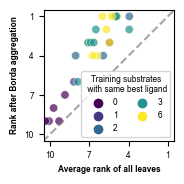

In [10]:
fig, ax = plt.subplots(figsize=(1.7, 1.7))
ax.set_aspect("equal")
sns.scatterplot(info_to_plot, x="Average", y="Borda", hue="num train", palette="viridis", alpha=0.7)
ax.set_xlim(0.5, 10.5)
ax.set_ylim(0.5, 10.5)
plt.ylim(reversed(plt.ylim()))
plt.xlim(reversed(plt.xlim()))
ax.plot(np.arange(0, 10.5, 0.05), np.arange(0, 10.5, 0.05), c="grey", ls="--", alpha=0.7)
ax.set_xticks([10,7,4,1])
ax.set_xticklabels([10,7,4,1], fontdict={"fontfamily":"arial", "fontsize":6})
ax.set_xlabel("Average rank of all leaves", fontdict={"fontfamily":"arial", "fontsize":6, "fontweight":"bold"})
ax.set_yticks([10,7,4,1])
ax.set_yticklabels([10,7,4,1], fontdict={"fontfamily":"arial", "fontsize":6})
ax.set_ylabel("Rank after Borda aggregation", fontdict={"fontfamily":"arial", "fontsize":6, "fontweight":"bold"})
leg = ax.legend(loc="lower right", ncols=2, fontsize=6, title="Training substrates\n with same best ligand", title_fontproperties={"family":"arial", "size":6}, prop={"family":"arial", "size":6})
leg.get_title().set_ha("center")
# plt.savefig(f"figures/Figure6E_Borda_role.svg", dpi=300, format="svg")